In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../figures")

from what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [4]:
from main import init
args = init(filename='../data/2020-02-02_train')

In [5]:
args.contrast = None

## Unit tests

In [6]:
i_offset = None
j_offset = None

In [7]:
transform=transforms.Compose([
                               WhatShift(args,i_offset=i_offset, j_offset=j_offset),
                               WhatBackground(contrast = args.contrast,
                                              noise=args.noise, 
                                              sf_0=args.sf_0, 
                                              B_sf=args.B_sf),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [8]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [9]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [10]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [11]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [12]:
data, label = next(iter(train_loader))

In [13]:
label.shape

torch.Size([100])

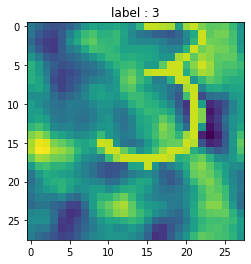

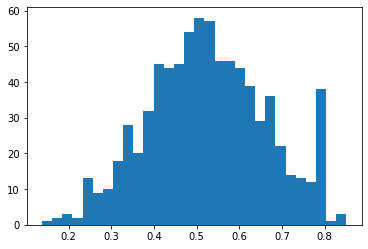

In [14]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))
plt.show()
h = plt.hist(data[i,:,:].detach().numpy().flatten(), 30)

In [15]:
device = 'cpu'
model = WhatNet().to(device)
loss_func = F.nll_loss
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [16]:
if False:
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, loss_func, optimizer, epoch)
        test(args, model, device, test_loader)

## WhatTrainer Class test

In [17]:
whatTrainer = WhatTrainer(args=args)

In [18]:
if False:
    for epoch in range(2, args.epochs + 1):
        whatTrainer.train(epoch)
        whatTrainer.test()

## What class test

In [ ]:
if True: #False:
    args.epochs = 1
    args.save_model = True
    what = What(args=args, force= True)
    acc = what.trainer.test()

Training the What model
Train Epoch: 1/1 [0/60000 (0%)]	Loss: 2.303330


### Script d'entraînement de /MNIST_cnn_0.1_0.1_1.0_None.pt

In [ ]:
if False :
    import sys
    import datetime

    #sys.path.append("../figures")
    #from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    #from main import init

    #args = init(filename='../data/2019-06-12')

    args.epochs = 5  # 10 plus tard
    args.save_model = True

    debut = datetime.datetime.now()
    date = str(debut)

    liste_std = [i for i in range(0, 16)]  # pas de 1 de std

    args.what_offset_max = 25
    args.do_adam = True #'adam'
    args.what_offset_std = liste_std[0]
    print("En cours : std = 0\n")
    what = What(args, force=True, seed=0, robust=True)

    seed = 1
    for std in liste_std[1:]:
        print("En cours : std = " + str(std) + "\n")

        args.what_offset_std = std
        what_model = what.model
        what = What(args, model=what_model, force=True, seed=seed, robust=True)
        seed += 1
        print("\n")
        if args.contrast is not None:
            suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
        else:
            suffix = "robust_{}_{}_{}_all_{}".format(args.sf_0, args.B_sf, args.noise, std)
        what_model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
        torch.save(what_model, what_model_path)

    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : " + str(fin - debut))



In [ ]:
print(args.contrast)

In [ ]:
if False:
    what_model = what.model
    if args.contrast is not None:
        suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
    else:
        suffix = "robust_{}_{}_{}_all_{}".format(args.sf_0, args.B_sf, args.noise, std)
    what_model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
    torch.save(what_model, what_model_path)

In [ ]:
acc = what.trainer.test()

In [ ]:
std = 15
suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
print(model_path)
what_model = torch.load(model_path)
if True:
    args.what_offset_std = 0
    seed = 1
    what = What(args, model=what_model, seed=seed)
    acc = what.trainer.test()

In [ ]:
if False:
    suffix = "robust_{}_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast, std)
    model_path = "../data/MNIST_cnn_{}.pt".format(suffix)
    model = torch.load(model_path)
    print(args.do_adam)
    acc_map = np.zeros((55, 55))
    seed = 0
    for i_offset in range(-27,28):
        for j_offset in range(-27,28):
            transform=transforms.Compose([
                                   WhatShift(args, i_offset=i_offset, j_offset=j_offset),
                                   WhatBackground(contrast = args.contrast,
                                                  noise=args.noise, 
                                                  sf_0=args.sf_0, 
                                                  B_sf=args.B_sf,
                                                  seed = seed),
                                   transforms.ToTensor(),
                                   #transforms.Normalize((args.mean,), (args.std,))
                               ])
            dataset_test = MNIST('../data',
                            train=False,
                            download=True,
                            transform=transform,
                            )
            test_loader = torch.utils.data.DataLoader(dataset_test,
                                             batch_size=args.minibatch_size,
                                             shuffle=True)
            whatTrainer = WhatTrainer(args, model = model, test_loader = test_loader, seed = seed)
            acc = whatTrainer.test()
            print(i_offset, j_offset, acc)
            acc_map[i_offset + 27, j_offset + 27] = acc
            seed += 1

    map_path = "../data/MNIST_accuracy_{}.npy".format(suffix)
    np.save(map_path, acc_map)        

## Affichage Accuracy map enregistrée en txt

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

map_path = "../data/MNIST_accuracy_{}.npy".format(suffix)
acc_map = np.load(map_path)      
fig = plt.figure(figsize=(10,8))
for i in range(55):
    for j in range(55):
        acc_map[i,j] = max(acc_map[i,j], 0.1)

ax = fig.add_subplot(111, projection='3d')

X = np.arange(-27, 28)
Y = np.arange(-27, 28)
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, acc_map, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=0.5)

#ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, acc_map, [0.2, 0.3, 0.4, 0.5, 0.6, 0.7], zdir='z', offset=0, cmap=cm.coolwarm, alpha = 1)
cset = ax.contour(X, Y, acc_map, [-20, -10, 0, 10, 20], zdir='x', offset=-27.5, cmap = 'gray')
cset = ax.contour(X, Y, acc_map,  [-20, -10, 0, 10, 20], zdir='y', offset=27.5, cmap = 'gray')


# Customize the z axis.
ax.set_xlim(-27.5, 27.5)
ax.set_zlim(-27.5, 27.5)
ax.set_zlim(0, 0.8)
ax.zaxis.set_major_locator(LinearLocator(9))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title('Classification accuracy', size=15)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, ticks=[0.2,0.3,0.4,0.5,0.6,0.7,0.8])

figname = '../figures/what_map'
fig.savefig(figname + '.png', bbox_inches='tight', pad_inches=0.1)


In [ ]:
np.max(acc_map)

In [ ]:
X

In [ ]:
Y